# Project: Investigate a Dataset - [FBI_Gun_Data]

## Table of Contents
<ul>
<li><a
 href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this notebook, we will analyze data for two related data sets:

>1- Gun Data (NICS Data), this data comes from the FBI's
National Instant Criminal Background
Check System, it is a system that contains people who are allowed to own weapons and people who have a criminal history. Our data is columns that contains
the number of firearm checks by
month, state, type, and totals.

>2-Census Data: It contains several
variables at the state level.variables may be have one data
point per state , or have data for more than one
year, columns(fact,fact note,states).

### Questions:
<ul>
<li><a href='#q1'>1- How much growth rate in gun registration in each state?</a></li>
<li><a href='#q2'>2- What is the over all trend in gun phrchases?</a></li>
<li><a href='#q3'>3- How many persons are permitted to own gun in last date?</a></li>
<li><a href='#q4'>4- How many persons are permitted versus not permitted to own gun in Arizona state in last date?</a></li>
<li><a href='#q5'>5- How much quantity of each types of guns?</a></li>
<li><a href='#q6'>6- in which state did men owned firms by maximum number of gun in 2012?</a></li>
<li><a href='#q7'>7- How many gun registered in all states in 2017?</a></li>
<li><a href='#q8'>8- how many gun registered in each state i  2000?</a></li>
<li><a href='#q9'>9- What is the average of guns registered in each states since 1998?</a></li>
<li><a href='#q10'>10- How many guns registered in Texas in 2017?</a></li>
<li><a href='#q11'>11- What is the total revenue of all fims in all states in 2012?</a></li>
</ul>


In [1]:
#import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Loading DataFrames
# read_csv to read and load csv file
# read_excel to read and load xlsx file
df_census = pd.read_csv('US_Census_Data.csv')
df_gun = pd.read_excel('gun_data.xlsx')

In [4]:
# print out first 5 rows of census data
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
# info() to show some general information of data
# there are missing values
# there are incorrect data types
# shape(85,52)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [6]:
# see number of columns that contain missing values (NaN)
df_census.isnull().any().sum()

52

In [7]:
# number of missing values
df_census.isnull().sum().sum()

1062

In [8]:
# which columns have missing and count it
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [9]:
# there are three duplicates values
df_census.duplicated().sum()

3

In [10]:
# do the same with df_gun
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [11]:
# show general information
# missing values
# incorrect data types
# shape(12485,27)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [12]:
# number of columns has missing values
df_gun.isnull().any().sum()

23

In [13]:
# number of missing values
df_gun.isnull().sum().sum()

154595

In [14]:
# which columns contain missing value
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [15]:
# check duplicates value
# there are no duplicates
df_gun.duplicated().sum()

0


### Data Cleaning


In [16]:
# fixing data type
# we need to convert type of states column in census data from object type to float type
# but state data separated by (,) then when we try conver this data using extract and astype methods
# data will converted as minimum float number
# to solve this we remove sympol like , and % then convert it
# but astype() method can't convert string to float(its NaN value)
# first we fill NaN with type of same data because float object has no attibuute split
# after convert, we get NaN again then we fill it again by mean, that is better.

#for column in df_census.columns[2:]:
#    df_census[column]=df_census[column].str.extract('(\d+)').astype(float)
#    df_census[column]= pd.to_numeric(df_census[column],errors='coerce')
#    df_census[column]=df_census[column].replace(',','.').str.extract('(\d)').astype(float)

df_census.fillna('1,111',inplace=True)

for column in df_census.columns[2:]:
    df_census[column]=df_census[column].apply(lambda x:x.split()[0].replace(',',''))
    df_census[column]=df_census[column].apply(lambda x:x.split()[0].replace('%',''))
    df_census[column]=df_census[column].str.extract('(\d+)').astype(float)
    
df_census.replace('1,111',np.NaN, inplace=True)
df_census.replace(1111.0, np.NaN, inplace=True)
   

In [17]:
# confirm changes
df_census.head(66)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",NaN,1.0,4.0,8.0,2.0,5.0,10.0,0.0,6.0,...,0.0,0.0,10.0,10.0,0.0,5.0,8.0,1.0,1.0,3.0
3,"Population, Census, April 1, 2010",NaN,4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,...,814180.0,6346105.0,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,...,0.0,0.0,7.0,8.0,4.0,6.0,6.0,5.0,5.0,6.0
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.0,7.0,7.0,6.0,6.0,6.0,5.0,6.0,...,0.0,0.0,7.0,9.0,5.0,6.0,6.0,5.0,6.0,7.0
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.0,25.0,23.0,23.0,23.0,22.0,21.0,21.0,...,0.0,0.0,26.0,30.0,19.0,22.0,22.0,20.0,22.0,23.0
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.0,26.0,25.0,24.0,25.0,24.0,22.0,22.0,...,0.0,0.0,27.0,31.0,20.0,23.0,23.0,20.0,23.0,24.0
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.0,10.0,16.0,16.0,13.0,13.0,16.0,17.0,...,0.0,0.0,12.0,10.0,18.0,14.0,14.0,18.0,16.0,15.0
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.0,7.0,13.0,14.0,11.0,10.0,14.0,14.0,...,0.0,0.0,10.0,9.0,14.0,12.0,12.0,16.0,13.0,12.0


In [18]:
# fixing NaN values
# first one to fill numerical NaN with mean
# second one to fill string NaN with any word like non
# and confirm changes
df_census.fillna(df_census.mean(), inplace=True)
df_census.fillna('non',inplace=True)
df_census.isnull().any().sum()

0

In [19]:
# drop duplicates and confirm changes
df_census.drop_duplicates(inplace=True)
df_census.duplicated().sum()

0

In [20]:
# convert time in month column to datetime
# confirm changes
df_gun['month'] = pd.to_datetime(df_gun['month'])
df_gun['month'].dtype

dtype('<M8[ns]')

In [21]:
# fixing missing value and confirm changes
df_gun.fillna(df_gun.mean(), inplace=True)
df_gun.isnull().any().sum()

0

In [22]:
# confirm census data after cleaning
df_census.head(66)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",non,4863300.0,7.418940e+05,6.931071e+06,2.988248e+06,3.925002e+07,5.540545e+06,3.576452e+06,9.520650e+05,...,8.654540e+05,6.651194e+06,2.786260e+07,3.051217e+06,6.245940e+05,8.411808e+06,7.288000e+06,1.831102e+06,5.778708e+06,5.855010e+05
1,"Population estimates base, April 1, 2010, (V2...",non,4780131.0,7.102490e+05,6.392301e+06,2.916025e+06,3.725452e+07,5.029324e+06,3.574114e+06,8.979360e+05,...,8.141950e+05,6.346298e+06,2.514610e+07,2.763888e+06,6.257410e+05,8.001041e+06,6.724545e+06,1.853011e+06,5.687289e+06,5.637670e+05
2,"Population, percent change - April 1, 2010 (es...",non,1.0,4.000000e+00,8.000000e+00,2.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,0.000000e+00,5.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
3,"Population, Census, April 1, 2010",non,4779736.0,7.102310e+05,6.392017e+06,2.915918e+06,3.725396e+07,5.029196e+06,3.574097e+06,8.979340e+05,...,8.141800e+05,6.346105e+06,2.514556e+07,2.763885e+06,6.257410e+05,8.001024e+06,6.724540e+06,1.852994e+06,5.686986e+06,5.636260e+05
4,"Persons under 5 years, percent, July 1, 2016, ...",non,6.0,7.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,5.000000e+00,...,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
5,"Persons under 5 years, percent, April 1, 2010",non,6.0,7.000000e+00,7.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00,...,0.000000e+00,0.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00
6,"Persons under 18 years, percent, July 1, 2016,...",non,22.0,2.500000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.200000e+01,2.100000e+01,2.100000e+01,...,0.000000e+00,0.000000e+00,2.600000e+01,3.000000e+01,1.900000e+01,2.200000e+01,2.200000e+01,2.000000e+01,2.200000e+01,2.300000e+01
7,"Persons under 18 years, percent, April 1, 2010",non,23.0,2.600000e+01,2.500000e+01,2.400000e+01,2.500000e+01,2.400000e+01,2.200000e+01,2.200000e+01,...,0.000000e+00,0.000000e+00,2.700000e+01,3.100000e+01,2.000000e+01,2.300000e+01,2.300000e+01,2.000000e+01,2.300000e+01,2.400000e+01
8,"Persons 65 years and over, percent, July 1, 2...",non,16.0,1.000000e+01,1.600000e+01,1.600000e+01,1.300000e+01,1.300000e+01,1.600000e+01,1.700000e+01,...,0.000000e+00,0.000000e+00,1.200000e+01,1.000000e+01,1.800000e+01,1.400000e+01,1.400000e+01,1.800000e+01,1.600000e+01,1.500000e+01
9,"Persons 65 years and over, percent, April 1, 2010",non,13.0,7.000000e+00,1.300000e+01,1.400000e+01,1.100000e+01,1.000000e+01,1.400000e+01,1.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,9.000000e+00,1.400000e+01,1.200000e+01,1.200000e+01,1.600000e+01,1.300000e+01,1.200000e+01


In [23]:
# confirm nics data after cleaning
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [24]:
# show some general properties
df_census.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,...,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01
mean,5.644810e+06,6.965095e+05,6.042079e+06,3.162765e+06,4.686571e+07,5.907422e+06,6.449429e+06,1.203696e+06,1.905439e+07,1.101339e+07,...,1.195122e+06,8.342865e+06,4.004406e+07,3.142726e+06,7.208260e+05,8.711424e+06,8.875524e+06,1.710532e+06,8.099572e+06,6.921724e+05
std,1.778849e+07,2.217958e+06,1.739900e+07,9.604165e+06,1.408072e+08,1.784105e+07,2.189089e+07,3.797209e+06,5.638734e+07,3.246234e+07,...,3.573824e+06,2.490916e+07,1.262991e+08,9.412073e+06,2.019675e+06,2.588748e+07,2.672587e+07,4.717679e+06,2.579573e+07,1.996627e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.325000e+01,2.050000e+01,2.625000e+01,2.150000e+01,3.250000e+01,2.400000e+01,2.275000e+01,2.275000e+01,2.625000e+01,2.725000e+01,...,0.000000e+00,0.000000e+00,3.600000e+01,3.100000e+01,3.950000e+01,2.925000e+01,2.750000e+01,3.100000e+01,2.400000e+01,2.425000e+01
50%,4.713400e+04,2.152400e+04,8.192450e+04,3.867650e+04,2.040780e+05,7.323900e+04,4.745800e+04,1.986350e+04,1.376200e+05,7.715000e+04,...,2.511650e+04,5.229900e+04,1.897215e+05,4.270650e+04,2.226900e+04,7.072450e+04,6.375850e+04,3.051550e+04,4.693200e+04,2.542150e+04
75%,5.644810e+06,6.965095e+05,6.042079e+06,3.162765e+06,4.686571e+07,5.907422e+06,6.449429e+06,1.203696e+06,1.905439e+07,1.101339e+07,...,1.195122e+06,8.342865e+06,4.004406e+07,3.142726e+06,7.208260e+05,8.711424e+06,8.875524e+06,1.710532e+06,8.099572e+06,6.921724e+05
max,1.248098e+08,1.564330e+07,1.026714e+08,6.271292e+07,8.569542e+08,1.175396e+08,1.619622e+08,2.259738e+07,3.370745e+08,1.748394e+08,...,2.041106e+07,1.399605e+08,7.026031e+08,5.145327e+07,1.061509e+07,1.657889e+08,1.492588e+08,2.455307e+07,1.777289e+08,1.078379e+07


In [25]:
# show some general properties
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23729.495816,2736.848174,8611.677589,9302.758891,895.634628,783.185073,604.257419,10.023040,15.130888,0.676584,...,1.672013,0.178589,0.172556,33.418596,25.458626,2.096565,0.643964,0.717129,0.181592,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1165.956364,868.000000,2079.000000,163.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,4638.000000
50%,522.000000,1165.956364,3067.000000,5130.000000,360.471636,125.000000,0.000000,1.000000,3.000000,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,12399.000000
75%,4338.000000,1165.956364,7277.000000,10374.000000,360.471636,301.000000,0.000000,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [26]:
# show data in Fact column
df_census['Fact']

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

In [27]:
# check columns in df_gun to understand data
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis



In [28]:
# summary(it takes long time but you can run it !!!!)

# pd.plotting.scatter_matrix(df_gun, figsize=(50,50));

<a id='q1' > </a>
### Research Question 1  (How much growth in gun registration in each state?)

In [29]:
# grouped data by month,state to show total registration
filt = df_gun.groupby(['month','state'])['totals'].sum()

In [30]:
# calculate growth rating by subtract total registration in current date from total registration in earlier date
growth = filt.loc[df_gun['month'].max()] - filt.loc[df_gun['month'].min()]

Text(0,0.5,'Growth')

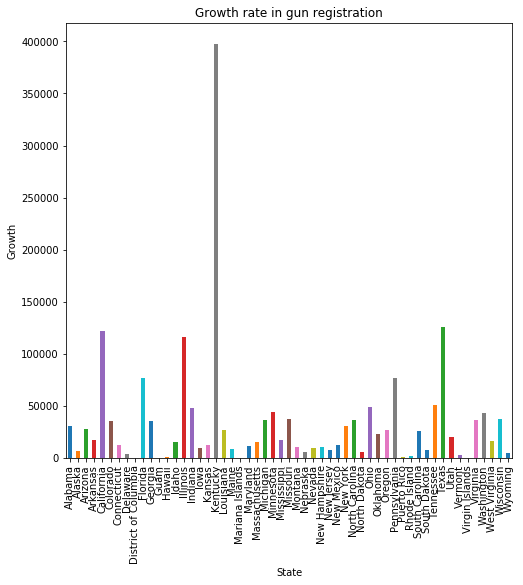

In [31]:
# visualize result
growth_plot = growth.plot(kind='bar', figsize=(8,8), title='Growth rate in gun registration');
growth_plot.set_xlabel('State')
growth_plot.set_ylabel('Growth')

In [32]:
# show max and min growth
growth[growth==growth.max()],growth[growth==growth.min()]

(state
 Kentucky    397866
 Name: totals, dtype: int64, state
 Virgin Islands    9
 Name: totals, dtype: int64)

>Maximum growth registration in (Kentucky) equal (397866)

>Minimum growth registration in (Virgin) equal (9)

<a id='q2'></a>
### Research Question 2 (what is the overall trend of gun purchases?)

In [33]:
# grouped data to show totals respect month
df_gun_trend = df_gun.groupby('month')['totals'].sum()
#df_gun.month.dt.year.unique()

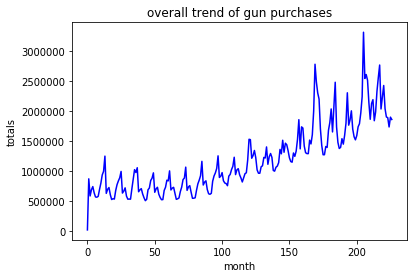

In [34]:
# visualize result using matplotlib
ind = np.arange(len(df_gun_trend))

plt.plot(ind,df_gun_trend, color='blue')
plt.title('overall trend of gun purchases')
plt.ylabel('totals')
plt.xlabel('month')
plt.figsize=(10,10)

> overall trend of purchases is constantly increasing.

<a id='q3' ></a>
### Research Question 3 (how many persons are permitted to own gun in last date)

In [35]:
# see last date
df_gun.month.max()

Timestamp('2017-09-01 00:00:00')

In [36]:
# filter data by last date
df_permit = df_gun.query('month == "2017-09"')[['permit','permit_recheck','state']]


Text(0,0.5,'Number of permits')

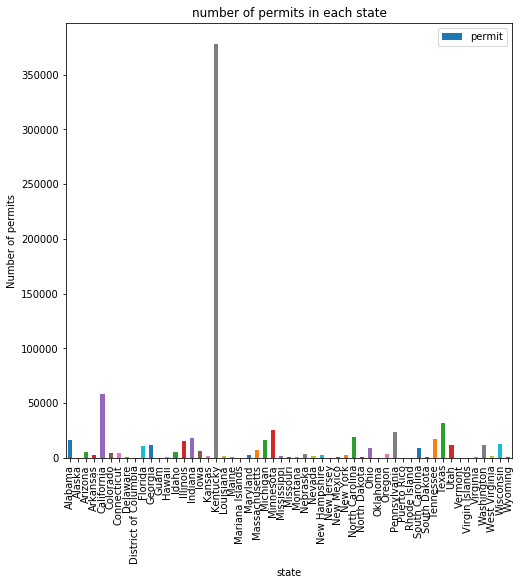

In [37]:
# visualize result
permit_plot = df_permit.plot(x='state', y='permit', kind='bar',figsize=(8,8),title='number of permits in each state');
permit_plot.set_ylabel('Number of permits')

In [38]:
# how many permitted in all state except Kentucky state
df_permit.permit.sum() - df_permit.permit.max()

383238.0

> Kentucky state has high permit.

> persons permitted to own gun in (Kentucky state) equal to approximately person permitted to own gun in (ALL) other states

<a id='q4'></a>
### Research Question 4  (How many persons are permitted versus not permitted in (Arizona state) in last date ?)

In [39]:
# filter data by Arizona state
Arizona_filt = df_permit.query('state == "Arizona"')

Text(0.5,0,'permit and permit_rwcheck')

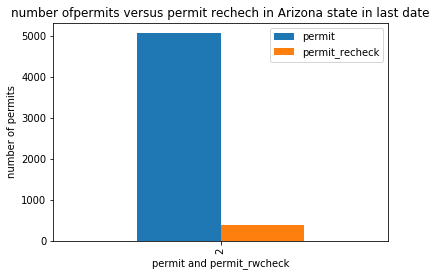

In [40]:
# visualize result
Arizona_permit_plot = Arizona_filt.plot(kind='bar', title='number ofpermits versus permit rechech in Arizona state in last date');
Arizona_permit_plot.set_ylabel('number of permits')
Arizona_permit_plot.set_xlabel('permit and permit_rwcheck')

In [41]:
Arizona_filt.sum()

permit               5069
permit_recheck        382
state             Arizona
dtype: object

> total permit in Arizona in 09-2017: 5069

> total permut_recheck in Arizona in 09-2017: 382

<a id='q5'></a>
### Research Question 5 (quantity types of guns)

In [42]:
# select type of guns and sum
df_gun_type = df_gun.iloc[:,4:26].sum()
df_gun_type

handgun                      7.417190e+07
long_gun                     9.751843e+07
other                        4.500488e+06
multiple                     3.353513e+06
admin                        7.353427e+05
prepawn_handgun              6.027785e+04
prepawn_long_gun             9.780943e+04
prepawn_other                2.067409e+03
redemption_handgun           5.093511e+06
redemption_long_gun          7.482665e+06
redemption_other             2.266339e+04
returned_handgun             3.697149e+05
returned_long_gun            9.435633e+04
returned_other               1.282894e+04
rentals_handgun              9.584444e+02
rentals_long_gun             1.089600e+03
private_sale_handgun         1.864760e+05
private_sale_long_gun        1.448623e+05
private_sale_other           1.286182e+04
return_to_seller_handgun     5.019222e+03
return_to_seller_long_gun    5.516100e+03
return_to_seller_other       1.323244e+03
dtype: float64

In [43]:
# index to use it in visualization using matplotlib
# labels to use it in visualization using matplotlin
# function return selected rwos of type

ind=np.arange(3)
labels=['handgun','long_gun','other']
def return_rwo(a,b):
    return df_gun_type.iloc[a:b]

Text(0.5,1,'quantity of gun_type and redemption_gun')

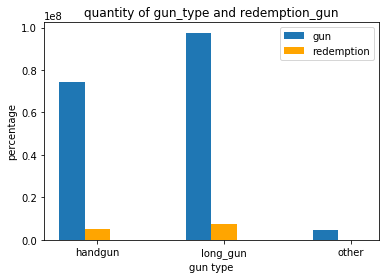

In [44]:
# visualize guns with redemption guns alone because they have high quantaty

plt.bar(ind,return_rwo(0,3),width=0.2,label='gun')
plt.bar(ind+0.2,return_rwo(8,11),color='orange',width=0.2,label='redemption')
plt.legend()
plt.xticks(ind+0.2,labels);
plt.xlabel('gun type')
plt.ylabel('percentage')
plt.title('quantity of gun_type and redemption_gun')

Text(0.5,1,'quantity of prepawn,returned,private and return to seller guns')

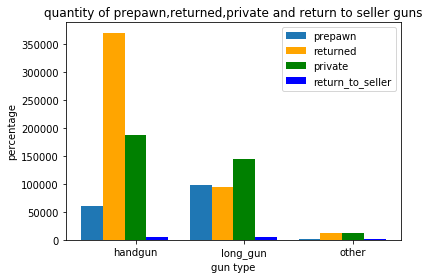

In [45]:
# visualize other types

plt.bar(ind,return_rwo(5,8),width=0.2,label='prepawn')
#plt.bar(ind+0.2,return_rwo(8,11),width=0.2,color='red')
plt.bar(ind+0.2,return_rwo(11,14),width=0.2,color='orange',label='returned')
#plt.bar(np.arange(2)+0.6,return_rwo(14,16),width=0.2,color='pink')
plt.bar(ind+0.4,return_rwo(16,19),width=0.2,color='green',label='private')
plt.bar(ind+0.6,return_rwo(19,22),width=0.2,color='blue',label='return_to_seller')

plt.legend()

plt.xticks(ind+0.4,labels);
plt.xlabel('gun type')
plt.ylabel('percentage')
plt.title('quantity of prepawn,returned,private and return to seller guns')

> long_gun have maximum quantity in (gun_type, redemption, prepawn)

> hand_gun have maximum quantity in (returned, private, return_to_seller)

<a id='q6'></a>
### Research Question 6 (In which state did men owned firms by maximum number of gun in 2012?)

In [46]:
# select rwo 56 that contain data who men_owned firms(2012)
# max_: max number of gun
# state: list contain states have the maximum number of gun
# for loop: loop for compare column number to maximum number and store column name having max in state

df_men_owned_firms = df_census.iloc[56:57,2:]

max_ = df_men_owned_firms.max(axis=1)
state=[]
for column in df_men_owned_firms.columns:
    if (df_men_owned_firms[column] == max_).any():
        max_ = df_men_owned_firms[column]
        state.append(column)
state,max_

(['California'], 56    1852580.0
 Name: California, dtype: float64)

> maximum number of gund that men owned firms in 2012 owned in Nebraska state

<a id='q7'></a>
### Research Question 7 (How many guns registered in 2017 in all states?)

In [47]:
# copy df_gun
# append year column in new dataframe from month column
# filter data by year 2017 and select only totals registeration
# calculate sum of totals in 2017 dataframe

df_copy = df_gun.copy()
df_copy['year'] = df_copy['month'].dt.year
df_copy.query('year == "2017"')['totals'].sum()

17990528

> there are 17990528 guns regustered in all state in 2017

<a id='q8'></a>
### Research Question 8 (How many guns registered in 2000 in each state?)

Text(0,0.5,'number of registeration')

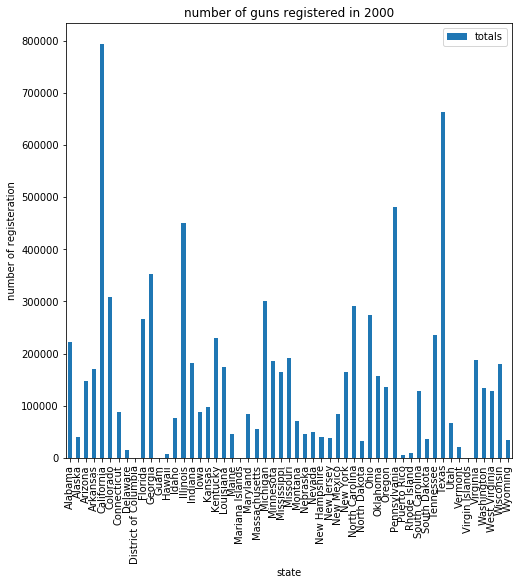

In [48]:
# filter data by year 2000 and select only state and totals columns
# grouped data by state
# visualize result

filter_2000 = df_copy.query('year == "2000"')[['state','totals']]
group = filter_2000.groupby('state').sum()
filter_2000_plot = group.plot(kind='bar',figsize=(8,8), title='number of guns registered in 2000')
filter_2000_plot.set_ylabel('number of registeration')

In [49]:
group.max()

totals    794506
dtype: int64

> California has the highest number of guns registration in 2000

<a id='q9'></a>
### Research Question 9 (Average guns registered in each state since 1998)

In [50]:
# filter data by state and select only totals column
# claculate mean in totals column in all date

total_filter = df_gun.groupby('state')['totals'].mean()
total_filter.mean()

21595.725911093308

Text(0,0.5,'Average')

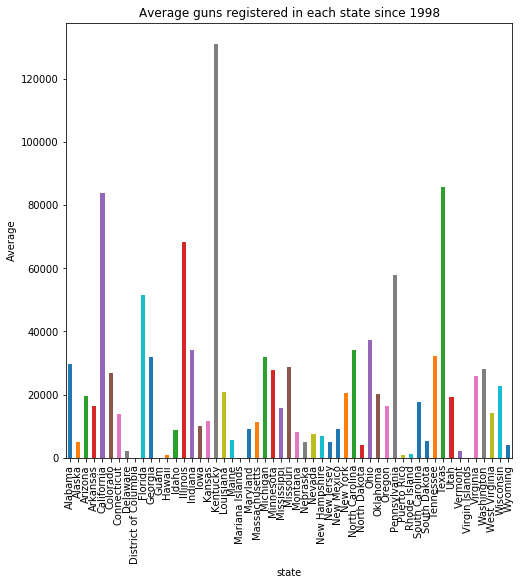

In [51]:
# visualize result
total_filter_plot = total_filter.plot(kind='bar',figsize=(8,8), title='Average guns registered in each state since 1998')
total_filter_plot.set_ylabel('Average')

> Kentucky has the highest average of gun registration since 1998

> California and Texas have the same average of gun registration

<a id='q10'></a>
### Research Question 10 (How many guns registered in 2017 in Texas)?

In [52]:
# filter data by year 2017 and Texas state and select only totals column
# calculate sum of totals

df_copy.query('year=="2017" and state=="Texas"')['totals'].sum()

1074971

> there are 1074971 gun registrations in Texas in 2017

<a id='q11'></a>
### Research Question 11 (What is the total revenue of all firms in all state in 2012?)

In [53]:
# select row 55 in df_census that contain revenue of firms in 2012
# calculate sum of revenue

df_census.iloc[55,2:].sum()

27744592.0

> 27744592 is the total revenue of all firms in all states in 2012

<a id='conclusions'></a>
## Conclusions

> from the previous analyzes we draw some important conclusions in several aspects:

> **growth in gun registration**

  > 1- the highest growth rate in gun registration in KENTUCKY state ( growth = 397899) from 1998 to 2017.
  
  > 2- the lowest growth rate in VIRGIN state (growth = 9).
  
  > 3- growth rate in CALIFORNIA,ILINOIS and TEXAS veryvclise and ranks third of growth.


> **registration**

  > 1- there are 17990528 total guns registered in all states in 2017.
  
  > 2- CALIFORNIA has the highest number of guns registration in 2000.
  
  > 3- KENTUCKY has the highest average of gun registration since 1998.
  
  > 4- CALIFORNIA and TEXAS have the same average of gun registration.
  
  > 5- there are 1074971 gun registered in TEXAS in 2017.
  

> **overall trend**

  > overall trend of gun purchases is constantly increasing and qickly.
  
  
> **permits**

  > 1- KENTUCKY state has the highest number ofpermits.
  
  > 2- number of permits in KENTUCKY is equal approximately number of permits in all other states.
  
  > 3- number of permits in ARIZONA in 09-2017 is 5069.
  
  > 4- number of permits recheck in ARIZONA in 09-2017 is 382.

> **quantities of guns types**

  > 1- long_gun has the highest quantity in (gun type,redemption,and prepawn)
  
  > 2- hand_gun has the highest quantity in (returned,private, and return_to_seller)
  
> **other**

  > 1- the highest number of guns that men owned firms buy in 2017was in NEBRASCA state.
  
  > 2- the total revenue of all firms in all states in 2012 equal 27744592.
  
### Limitations

> 1- in census data, all columns contain missing values, and the majority of columns contain 20 missing value out of 85 rows. meaning that approximately 25% of the data are missing and this is an exaggeration.

> 2- there are 154595 missing in the gun data, this represents about 45% of the total values, this is avery large number even if we try to complete it using appropriate methods, the result will still be somewhat inaccurate.

> 3- in gun data, there are months of specific years that have no been recorded, and there also states that have no been recorded.

> 4- the numeric values in census data separated by a comma, this makes converting them into float more difficult, and when doing this in the best way, there are completely inaccurate values and this changes the accuracy of the result.

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255